In [1]:
import pandas as pd
import os
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
# ランダムに生成する値のシードを固定して再現性を担保する
# https://qiita.com/kaggle_grandmaster-arai-san/items/d59b2fb7142ec7e270a5

def seed_everything(seed: int):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

In [2]:
ROOT_DIR = Path.cwd().parents[2]
DATA_DIR = ROOT_DIR / 'data'

ORIGINAL_DATA_DIR = DATA_DIR / 'original_data/atmaCup#18_dataset'
train_df = pd.read_csv(ORIGINAL_DATA_DIR / 'train_features.csv')
test_df = pd.read_csv(ORIGINAL_DATA_DIR / 'test_features.csv')
TARGET_COLUMNS = ['x_0',
 'y_0',
 'z_0',
 'x_1',
 'y_1',
 'z_1',
 'x_2',
 'y_2',
 'z_2',
 'x_3',
 'y_3',
 'z_3',
 'x_4',
 'y_4',
 'z_4',
 'x_5',
 'y_5',
 'z_5']

## targetの分布

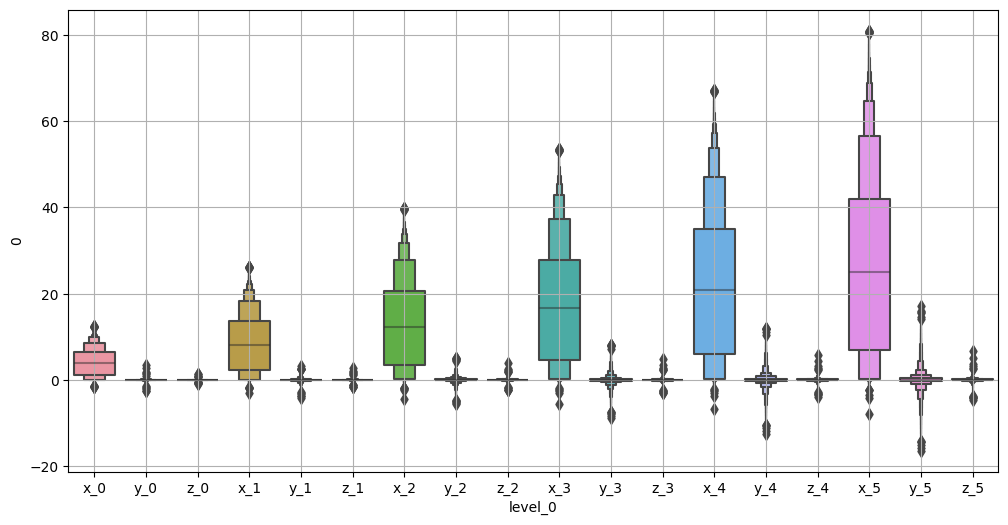

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=train_df[TARGET_COLUMNS].unstack().reset_index(), x="level_0", y=0, ax=ax)

ax.grid()

## trainデータのdescrive & info

In [4]:
train_df.describe()

,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,gas,x_0,y_0,z_0,x_1,...,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
count,43371.000000,4.337100e+04,43371.000000,43371.000000,43371.0,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,...,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000
mean,9.172176,-1.565403e-02,-2.065173,-19.009546,0.0,0.084003,4.122444,0.001949,0.001247,8.694386,...,0.003981,17.800580,0.009001,0.005223,22.330185,0.011159,0.006012,26.842607,0.013564,0.006648
std,7.226920,6.324017e-01,65.548822,110.799971,0.0,0.109837,3.266717,0.116866,0.040745,6.894355,...,0.127081,14.147079,1.041827,0.172892,17.772877,1.534514,0.220837,21.398114,2.111089,0.271671
min,-0.161919,-4.936206e+00,-481.394287,-700.000000,0.0,0.000000,-1.732154,-2.534138,-0.996548,-3.111055,...,-2.341347,-5.678676,-8.864628,-3.058673,-6.799718,-12.459174,-3.871224,-7.826888,-16.384152,-4.669255
25%,2.578437,-2.364085e-01,-3.461955,-94.000000,0.0,0.000000,1.116424,-0.026464,-0.017625,2.334760,...,-0.057172,4.729726,-0.182747,-0.079283,5.915811,-0.256305,-0.101681,7.034450,-0.337820,-0.125355
50%,8.518790,-1.834754e-15,-0.356471,-13.000000,0.0,0.000000,3.843337,0.001088,0.001111,8.082800,...,0.003061,16.567319,0.005099,0.004306,20.763180,0.006160,0.005289,24.947074,0.007994,0.005778
75%,14.286662,2.222577e-01,2.626873,51.000000,0.0,0.165000,6.428096,0.030661,0.019590,13.569024,...,0.064282,27.832859,0.206611,0.087342,34.947057,0.286425,0.111246,42.027520,0.372676,0.134975
max,27.551262,3.140070e+00,484.691711,700.000000,0.0,0.915000,12.392587,3.459556,1.447929,26.160461,...,3.920498,53.597005,8.201288,4.773078,67.242715,12.084923,5.743042,80.988900,17.151381,6.627251


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43371 entries, 0 to 43370
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                43371 non-null  object 
 1   vEgo              43371 non-null  float64
 2   aEgo              43371 non-null  float64
 3   steeringAngleDeg  43371 non-null  float64
 4   steeringTorque    43371 non-null  float64
 5   brake             43371 non-null  float64
 6   brakePressed      43371 non-null  bool   
 7   gas               43371 non-null  float64
 8   gasPressed        43371 non-null  bool   
 9   gearShifter       43371 non-null  object 
 10  leftBlinker       43371 non-null  bool   
 11  rightBlinker      43371 non-null  bool   
 12  x_0               43371 non-null  float64
 13  y_0               43371 non-null  float64
 14  z_0               43371 non-null  float64
 15  x_1               43371 non-null  float64
 16  y_1               43371 non-null  float6

## 1. vEgo

速度、単位はm/s

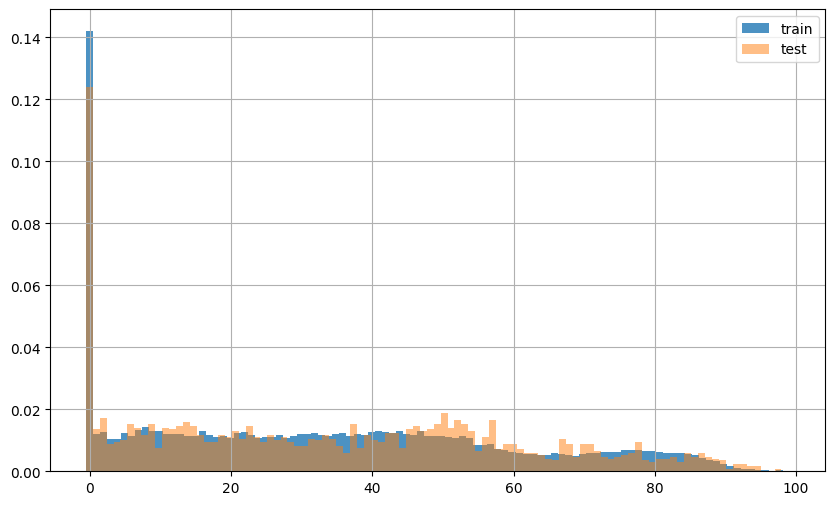

In [6]:
## 分布

train_vEgo_km_h = train_df['vEgo'] * 3600.0 / 1000
test_vEgo_km_h = test_df['vEgo'] * 3600.0 / 1000

fig, ax = plt.subplots(figsize=(10, 6))
train_vEgo_km_h.hist(bins=100, ax=ax, density=True, alpha=0.8, label="train")
test_vEgo_km_h.hist(bins=100, ax=ax, density=True, alpha=0.5, label="test")
ax.legend()

- 大体10%は止まっている
- バックはなし
- 60近くが高速かどうかの境目かも

- [ ] 速度と加速度のscatterを見たい

In [7]:
# バック
rate_back = (sum(train_vEgo_km_h < -0.5 ) / len(train_vEgo_km_h)) * 100
print(f'下がっている車: {rate_back:.2f}%')

下がっている車: 0.00%


In [8]:
# 止まってる割合
rate_stop = (sum(train_vEgo_km_h < 1.0 ) / len(train_vEgo_km_h)) * 100
print(f'止まってる車: {rate_stop:.2f}%')

止まってる車: 14.77%


In [9]:
# 60km/h以上の割合
rate_over_60 = (sum(train_vEgo_km_h > 60) / len(train_vEgo_km_h)) * 100
print(f'60km/h以上: {rate_over_60:.2f}%')

60km/h以上: 17.46%


Text(0, 0.5, 'x')

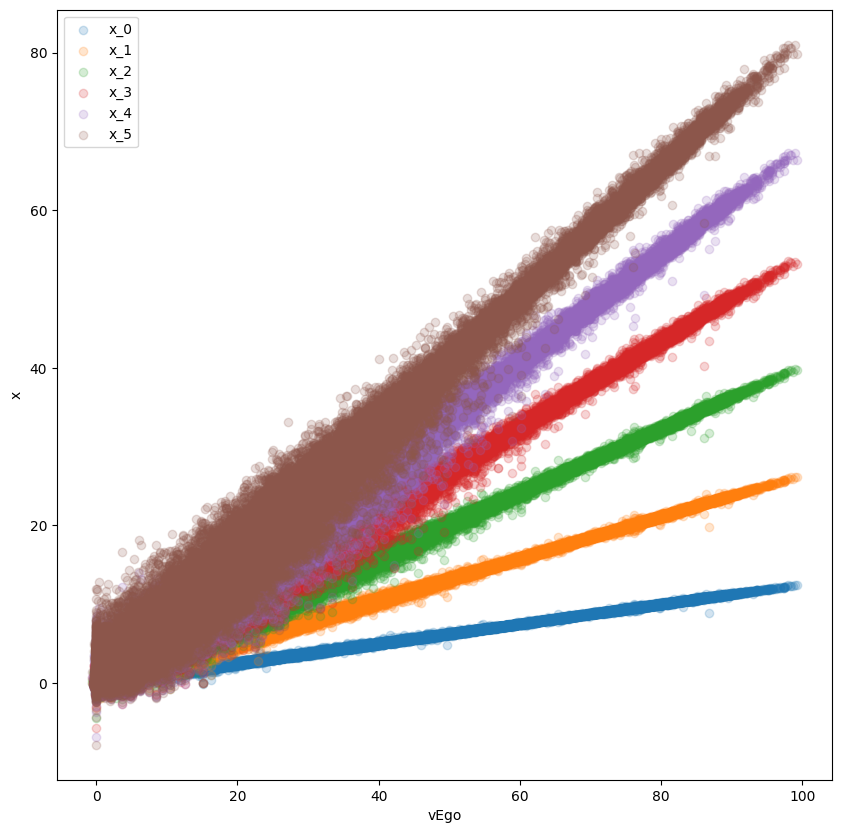

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_vEgo_km_h, train_df['x_0'].values, alpha=0.2,label='x_0')
ax.scatter(train_vEgo_km_h, train_df['x_1'].values, alpha=0.2,label='x_1')
ax.scatter(train_vEgo_km_h, train_df['x_2'].values, alpha=0.2,label='x_2')
ax.scatter(train_vEgo_km_h, train_df['x_3'].values, alpha=0.2,label='x_3')
ax.scatter(train_vEgo_km_h, train_df['x_4'].values, alpha=0.2,label='x_4')
ax.scatter(train_vEgo_km_h, train_df['x_5'].values, alpha=0.2,label='x_5')
ax.legend()
ax.set_xlabel('vEgo')
ax.set_ylabel('x')

## 2. aEgo

加速度, 単位はm/s^2

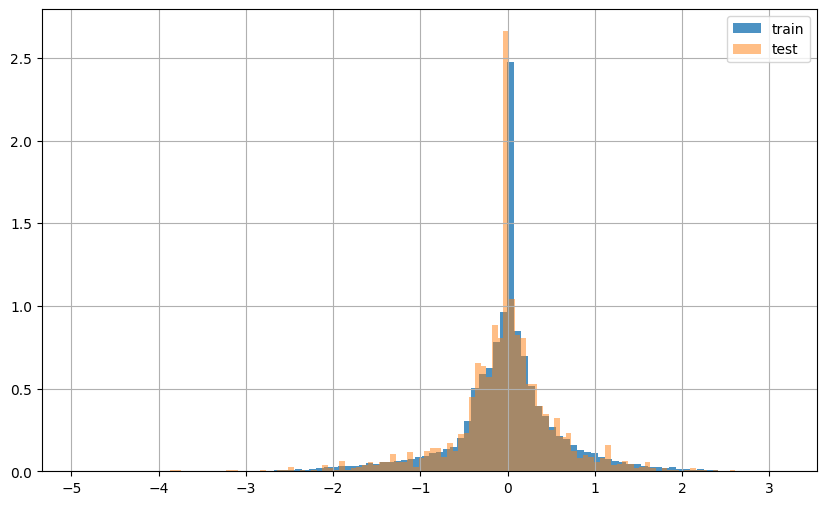

In [11]:
## 分布

fig, ax = plt.subplots(figsize=(10, 6))
train_df['aEgo'].hist(bins=100, ax=ax, density=True, alpha=0.8, label="train")
test_df['aEgo'].hist(bins=100, ax=ax, density=True, alpha=0.5, label="test")
ax.legend()

Text(0, 0.5, 'aEgo')

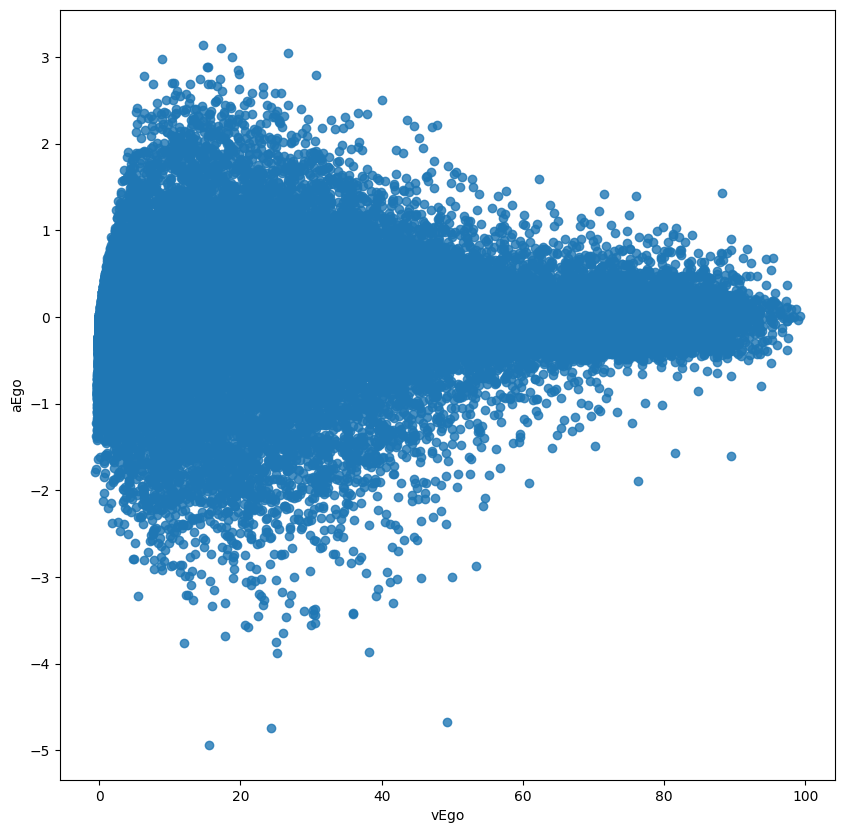

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_vEgo_km_h, train_df['aEgo'].values, alpha=0.8)
ax.set_xlabel('vEgo')
ax.set_ylabel('aEgo')

Text(0, 0.5, 'x')

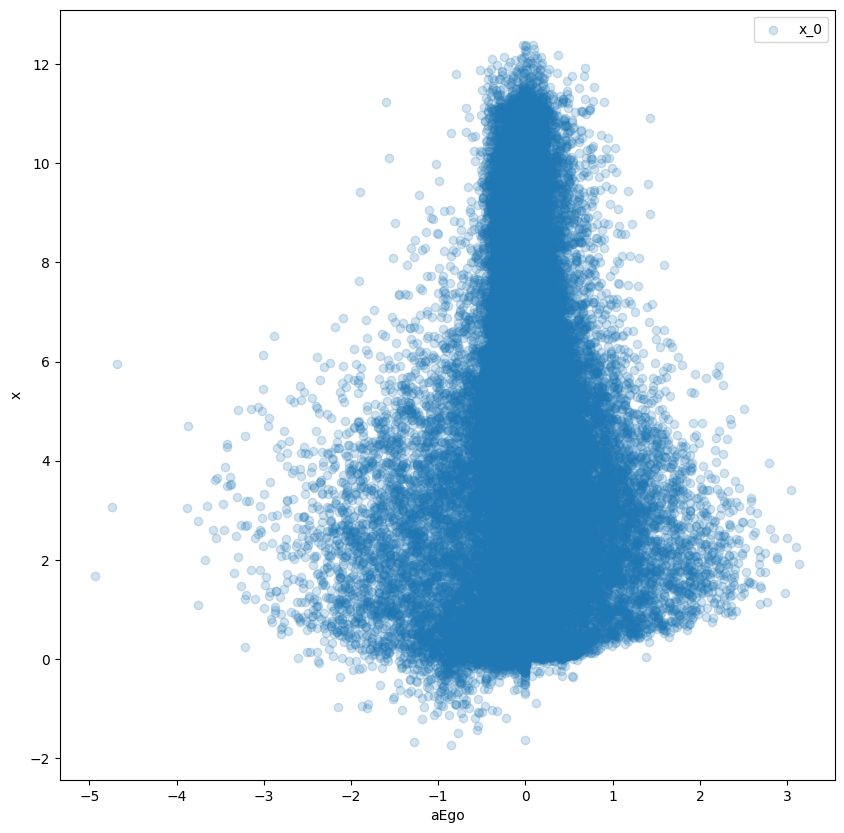

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_df['aEgo'], train_df['x_0'].values, alpha=0.2,label='x_0')
# ax.scatter(train_df['aEgo'], train_df['x_1'].values, alpha=0.2,label='x_1')
# ax.scatter(train_df['aEgo'], train_df['x_2'].values, alpha=0.2,label='x_2')
# ax.scatter(train_df['aEgo'], train_df['x_3'].values, alpha=0.2,label='x_3')
# ax.scatter(train_df['aEgo'], train_df['x_4'].values, alpha=0.2,label='x_4')
# ax.scatter(train_df['aEgo'], train_df['x_5'].values, alpha=0.2,label='x_5')
ax.legend()
ax.set_xlabel('aEgo')
ax.set_ylabel('x')

- 加速度がないときは特に距離に依存してなさそう (ゆっくりを保ったり速いを保ったり)
- 加速度が強いときはゆっくりっぽい

Text(0, 0.5, 'y')

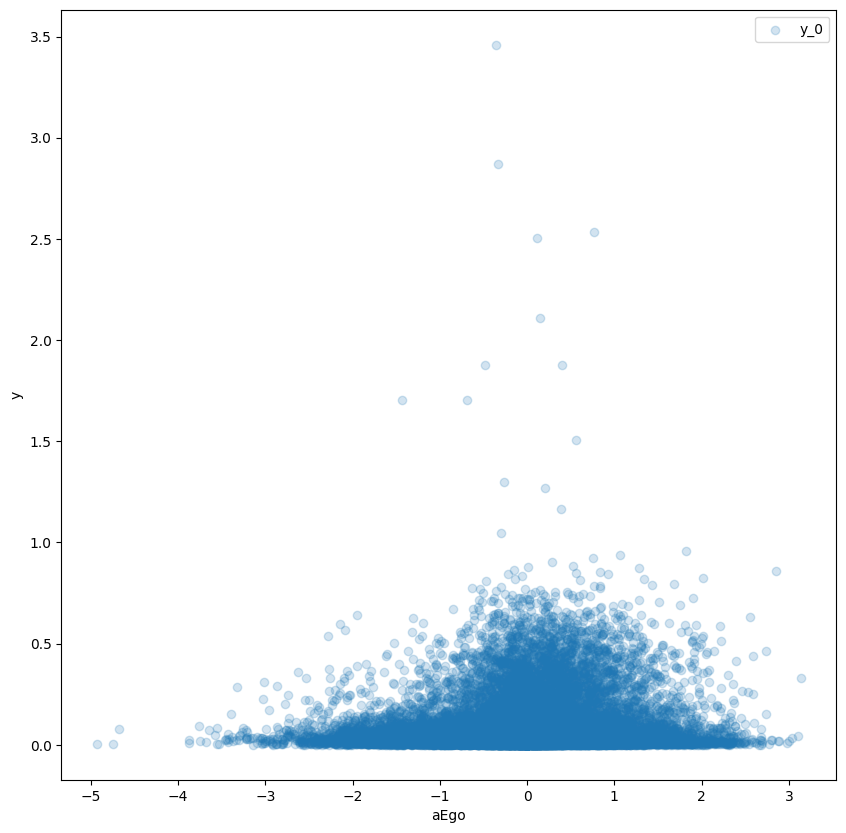

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_df['aEgo'], abs(train_df['y_0'].values), alpha=0.2,label='y_0')
# ax.scatter(train_df['aEgo'], train_df['x_1'].values, alpha=0.2,label='x_1')
# ax.scatter(train_df['aEgo'], train_df['x_2'].values, alpha=0.2,label='x_2')
# ax.scatter(train_df['aEgo'], train_df['x_3'].values, alpha=0.2,label='x_3')
# ax.scatter(train_df['aEgo'], train_df['x_4'].values, alpha=0.2,label='x_4')
# ax.scatter(train_df['aEgo'], train_df['x_5'].values, alpha=0.2,label='x_5')
ax.legend()
ax.set_xlabel('aEgo')
ax.set_ylabel('y')

- 加速度が高いまま横にいったりはしないよね

Text(0, 0.5, 'z_5')

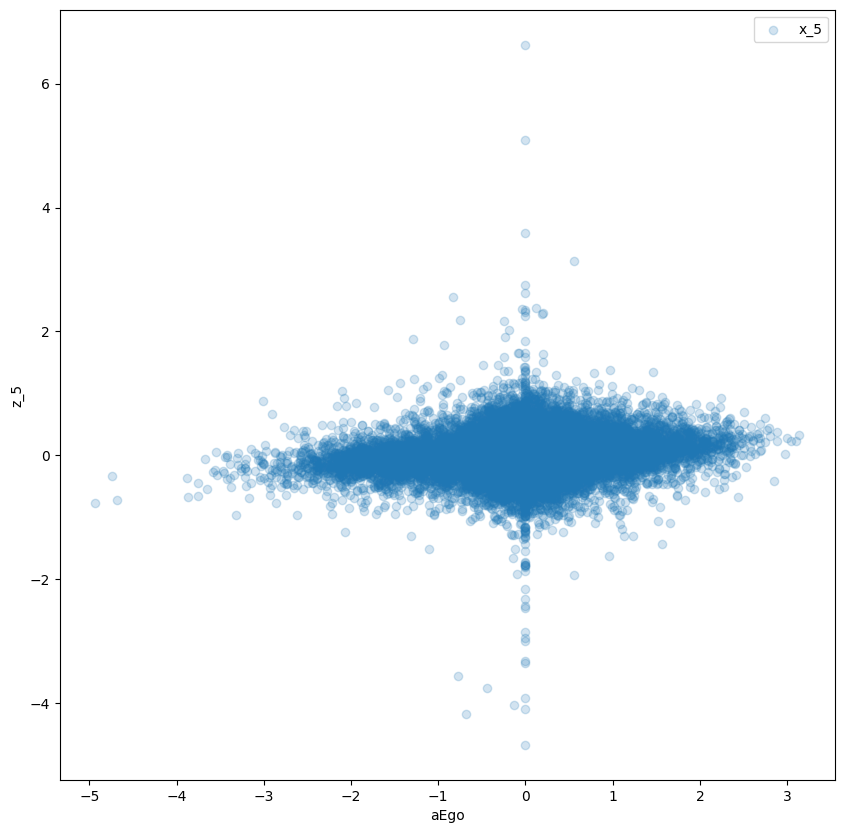

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(train_df['aEgo'], abs(train_df['z_0'].values), alpha=0.2,label='y_0')
# ax.scatter(train_df['aEgo'], train_df['x_1'].values, alpha=0.2,label='x_1')
# ax.scatter(train_df['aEgo'], train_df['x_2'].values, alpha=0.2,label='x_2')
# ax.scatter(train_df['aEgo'], train_df['x_3'].values, alpha=0.2,label='x_3')
# ax.scatter(train_df['aEgo'], train_df['x_4'].values, alpha=0.2,label='x_4')
ax.scatter(train_df['aEgo'], train_df['z_5'].values, alpha=0.2,label='x_5')
ax.legend()
ax.set_xlabel('aEgo')
ax.set_ylabel('z_5')

加速度が高いときはzを上げているときがあるかと思ったがそうでもない？

## 3. steeringAngleDeg

ハンドル角、度数

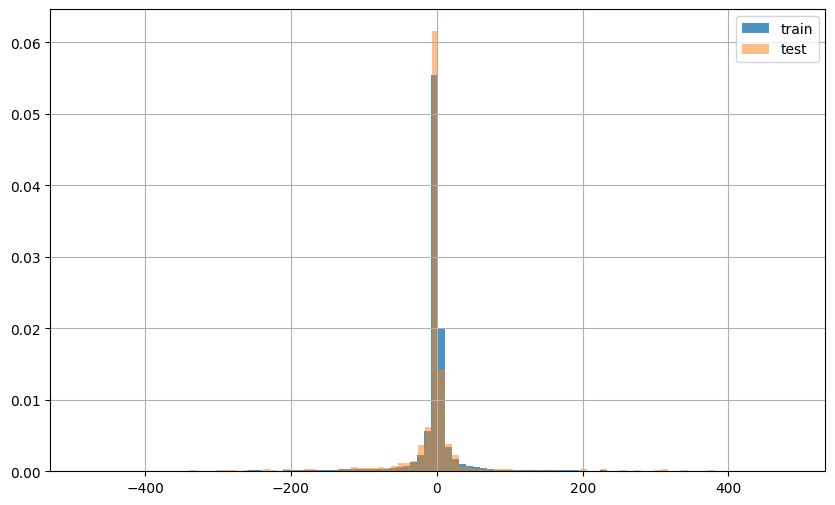

In [14]:
## 分布

fig, ax = plt.subplots(figsize=(10, 6))
train_df['steeringAngleDeg'].hist(bins=100, ax=ax, density=True, alpha=0.8, label="train")
test_df['steeringAngleDeg'].hist(bins=100, ax=ax, density=True, alpha=0.5, label="test")
ax.legend()

- カーブ時は360度以上もある。

In [15]:
# 360度以上
rate_curve = (sum(abs(train_df['steeringAngleDeg']) > 360 ) / len(train_df)) * 100
print(f'曲がる車: {rate_curve:.2f}%')

曲がる車: 0.65%


In [16]:
# 大体まっすぐ
rate_straight = (sum(abs(train_df['steeringAngleDeg']) < 5.0 ) / len(train_df)) * 100
print(f'まっすぐ(5度以下)の車: {rate_straight:.2f}%')

まっすぐ(5度以下)の車: 61.96%


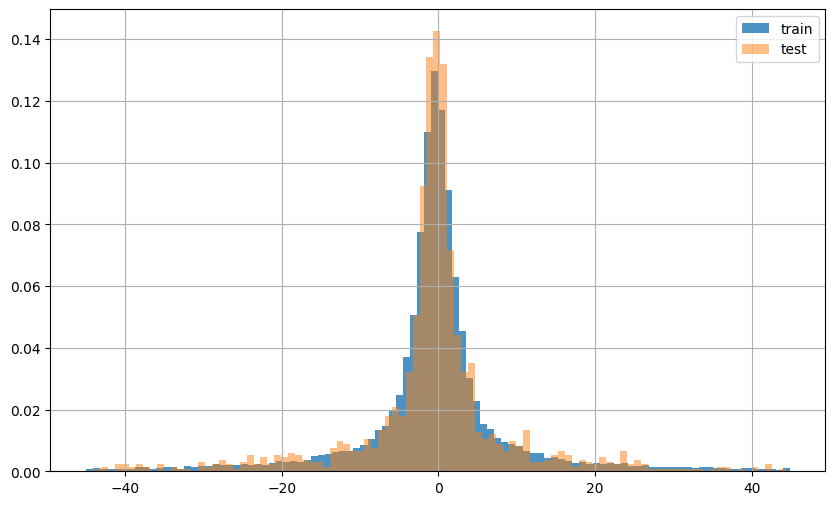

In [17]:
# 45度以内
fig, ax = plt.subplots(figsize=(10, 6))
train_df.query('abs(steeringAngleDeg) < 45')['steeringAngleDeg'].hist(bins=100, ax=ax, density=True, alpha=0.8, label="train")
test_df.query('abs(steeringAngleDeg) < 45')['steeringAngleDeg'].hist(bins=100, ax=ax, density=True, alpha=0.5, label="test")
ax.legend()

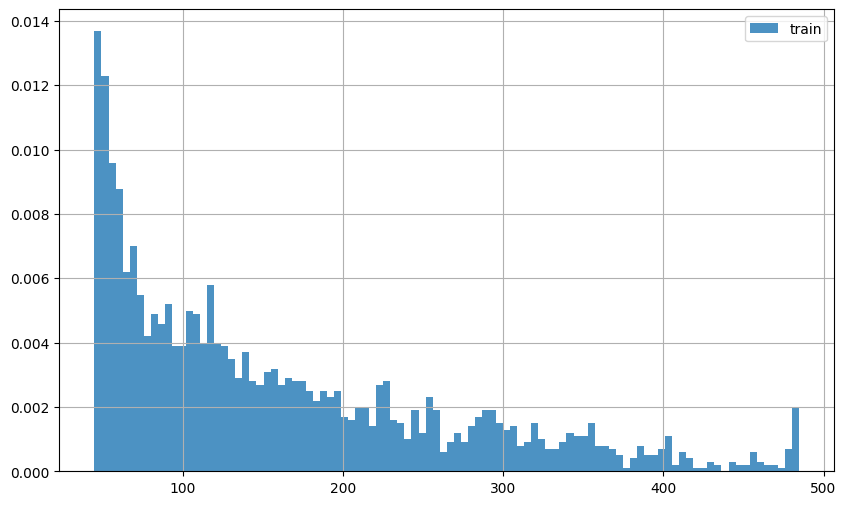

In [27]:
# 45度以上
fig, ax = plt.subplots(figsize=(10, 6))
train_df.query('steeringAngleDeg > 45')['steeringAngleDeg'].hist(bins=100, ax=ax, density=True, alpha=0.8, label="train")
# test_df.query('steeringAngleDeg > 45')['steeringAngleDeg'].hist(bins=100, ax=ax, density=True, alpha=0.5, label="test")
ax.legend()

Text(0, 0.5, 'steeringAngleDeg')

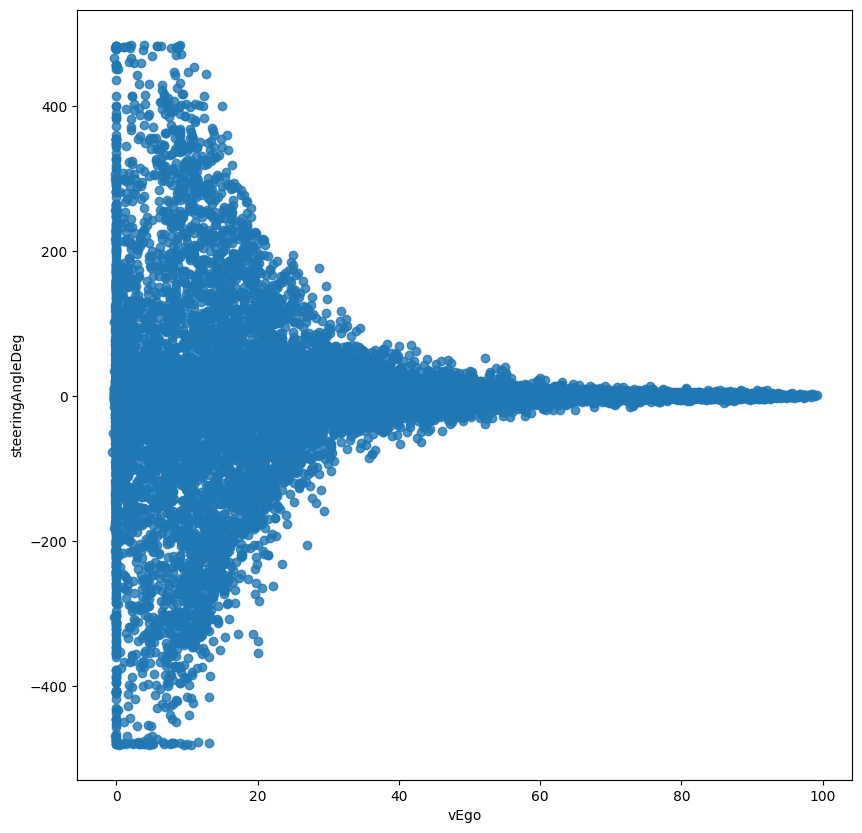

In [28]:
# 速度とカーブ

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_vEgo_km_h, train_df['steeringAngleDeg'].values, alpha=0.8)
ax.set_xlabel('vEgo')
ax.set_ylabel('steeringAngleDeg')

## 4. steeringTorque
ハンドルのトルク、単位はN・m、反時計回りが正

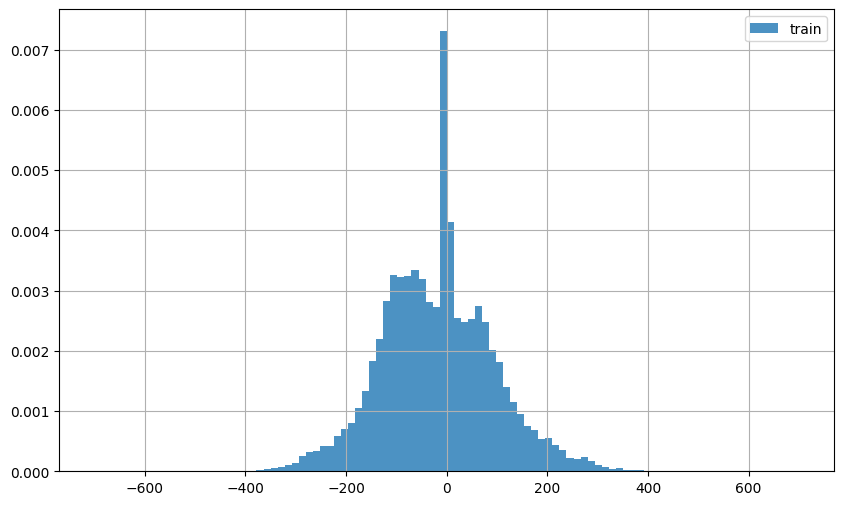

In [31]:
## 分布

fig, ax = plt.subplots(figsize=(10, 6))
train_df['steeringTorque'].hist(bins=100, ax=ax, density=True, alpha=0.8, label="train")
# test_df['steeringTorque'].hist(bins=100, ax=ax, density=True, alpha=0.5, label="test")
ax.legend()

- 変な分布
- 左右に山がある。

Text(0, 0.5, 'steeringTorque')

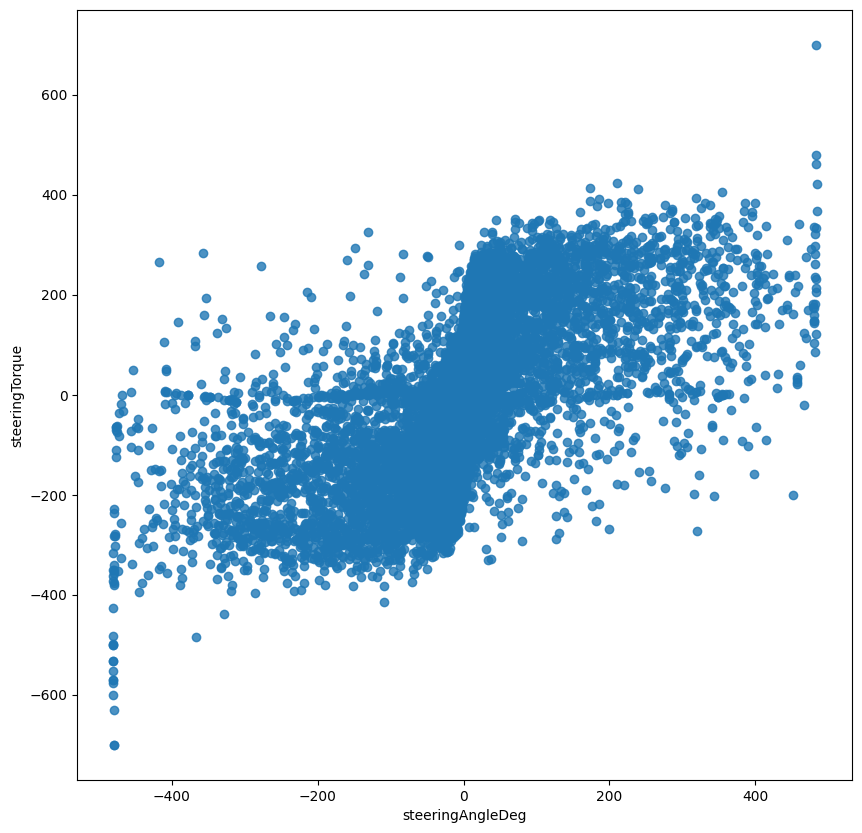

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_df['steeringAngleDeg'].values, train_df['steeringTorque'].values, alpha=0.8)
ax.set_xlabel('steeringAngleDeg')
ax.set_ylabel('steeringTorque')

- [ ] 分析しようね
- (少ないパターン) 左に曲げた状態から右に曲げている -> トルクはマイナスだがAngleはプラス (逆もしかり)
- トルクの分布で出てきた左右の山のところ (Torku=100弱) はよくわからず。
- 気持ちめっちゃ曲げる！というときのトルクは30度以上からあまり変わってない。たぶんハンドルを回しているとき、30度に達したあたりでほぼ最大パワーになってるという意味かな
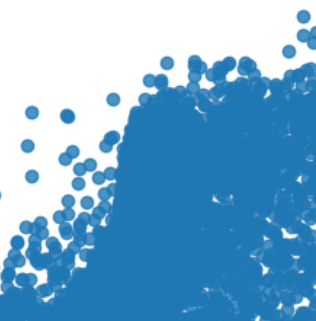

- この肘みたいなとこがたぶん30度くらい(逆側は0度だけど。。)

Text(0, 0.5, 'steeringTorque')

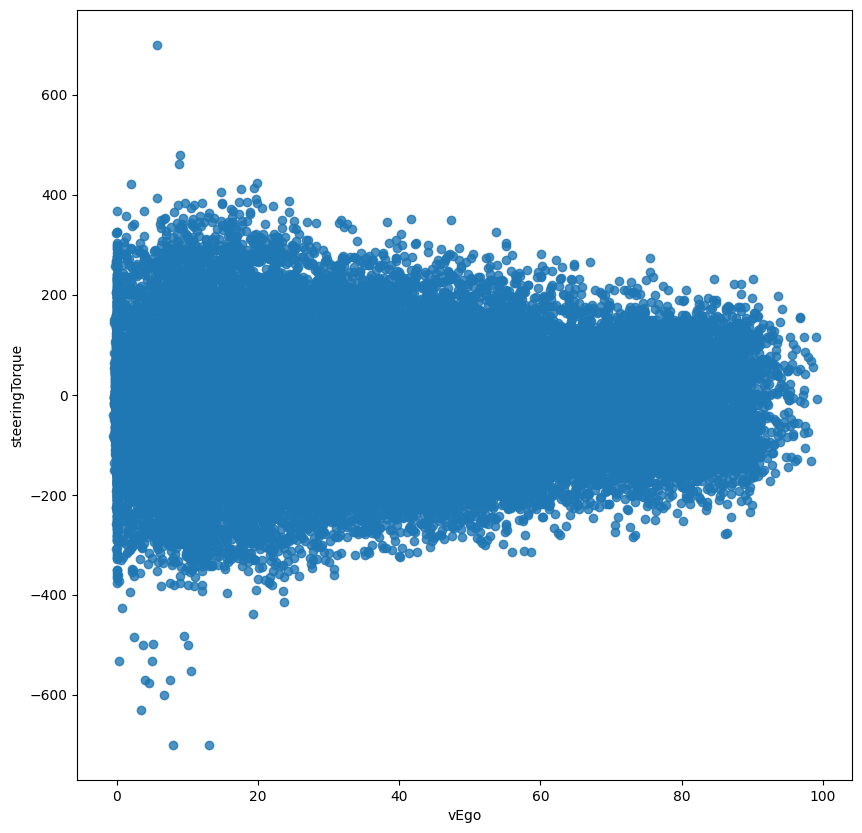

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_vEgo_km_h, train_df['steeringTorque'].values, alpha=0.8)
ax.set_xlabel('vEgo')
ax.set_ylabel('steeringTorque')

Text(0, 0.5, 'steeringTorque')

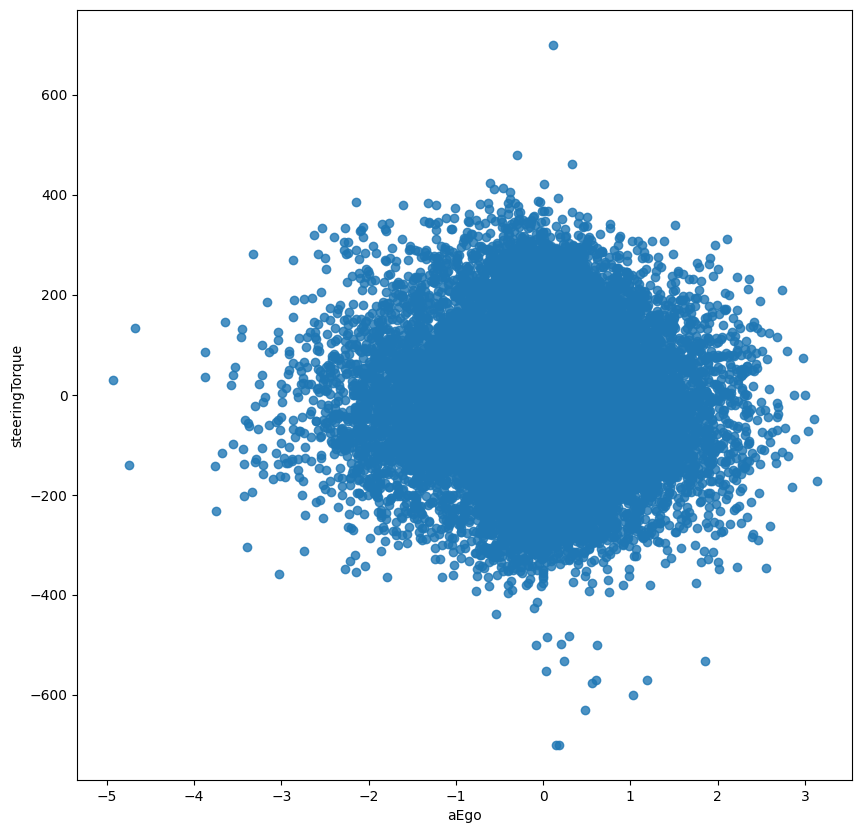

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_df['aEgo'].values, train_df['steeringTorque'].values, alpha=0.8)
ax.set_xlabel('aEgo')
ax.set_ylabel('steeringTorque')

## 6. brakePressed

ブレーキペダルが踏まれているかどうか

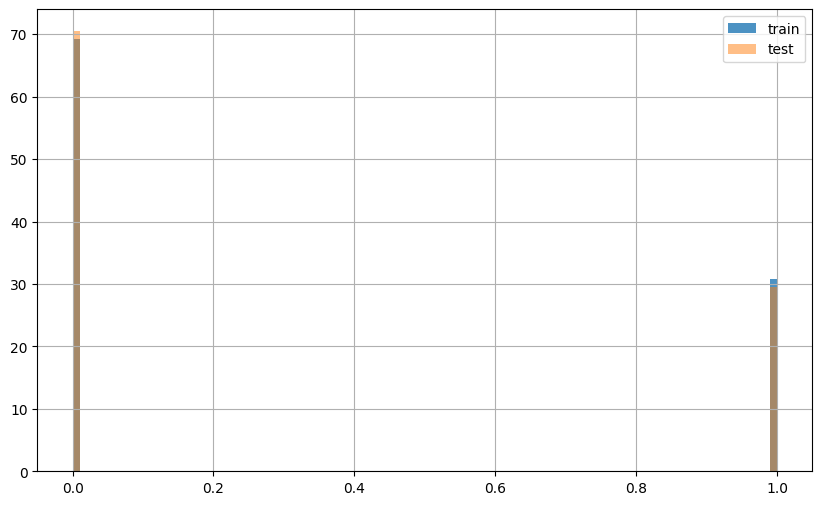

In [43]:
## 分布

fig, ax = plt.subplots(figsize=(10, 6))
train_df['brakePressed'].astype(int).hist(bins=100, ax=ax, density=True, alpha=0.8, label="train")
test_df['brakePressed'].astype(int).hist(bins=100, ax=ax, density=True, alpha=0.5, label="test")
ax.legend()

30%でブレーキが踏まれている

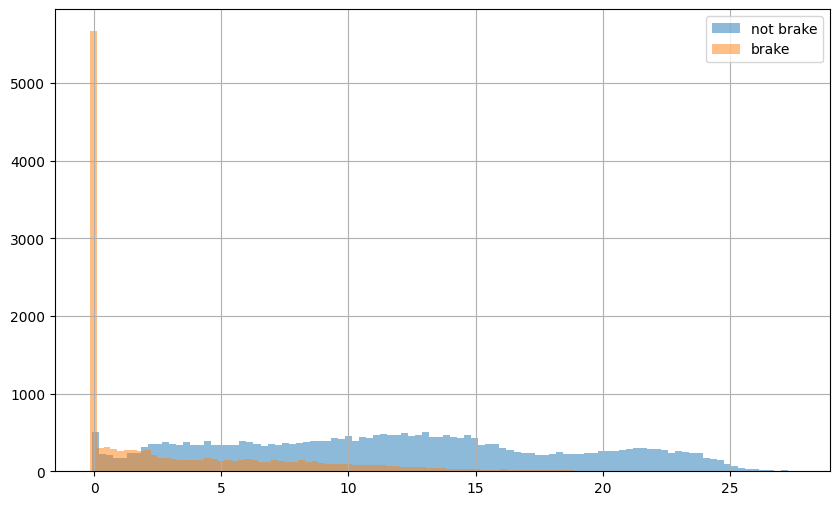

In [48]:
## 速度とブレーキ

fig, ax = plt.subplots(figsize=(10, 6))
train_df.query('not brakePressed')['vEgo'].hist(bins=100, ax=ax, alpha=0.5, label="not brake")
train_df.query('brakePressed')['vEgo'].hist(bins=100, ax=ax, alpha=0.5, label="brake")
ax.legend()

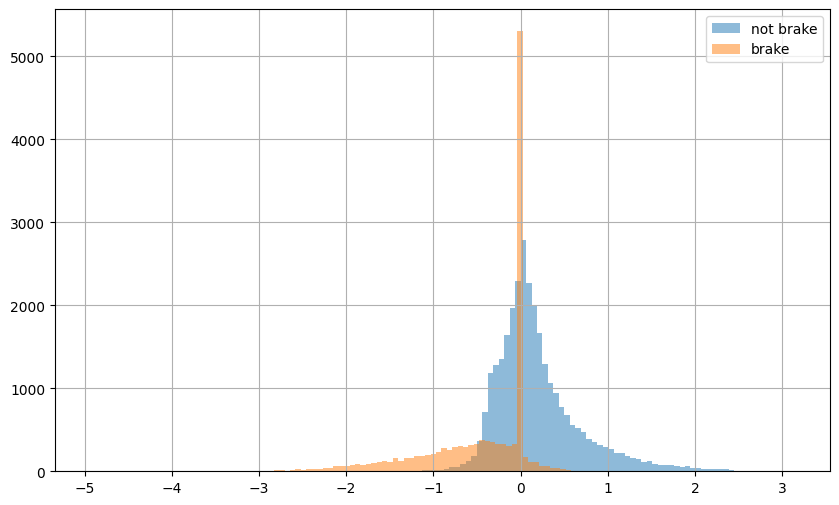

In [49]:
## 加速度とブレーキ

fig, ax = plt.subplots(figsize=(10, 6))
train_df.query('not brakePressed')['aEgo'].hist(bins=100, ax=ax, alpha=0.5, label="not brake")
train_df.query('brakePressed')['aEgo'].hist(bins=100, ax=ax, alpha=0.5, label="brake")
ax.legend()